# Visualisation d'un nuage de points et exploration des variables

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mp

In [11]:
dataset = pd.read_csv("./data/house_pricing.csv", sep=',')
print("dataset loaded")

dataset loaded


In [14]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
dataset.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

## Question 2

In [4]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Question 3

In [17]:
LotArea = dataset['LotArea']
SalesPrice = dataset['SalePrice']

In [5]:
LotArea

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [6]:
SalesPrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

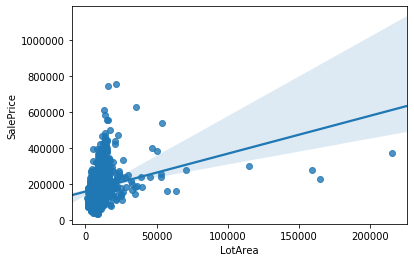

In [7]:
sns.regplot(x=LotArea, y=SalesPrice, fit_reg=True)

La plupart des "LotArea" se trouve dans la même zone de prix qui oscille entre 30 000 et 500 000 dollars pour des LotArea entre 0 et 20 000 pieds carrées. On remarque également quelques valeurs aberrantes sur la droite du graphe.

## Question 4

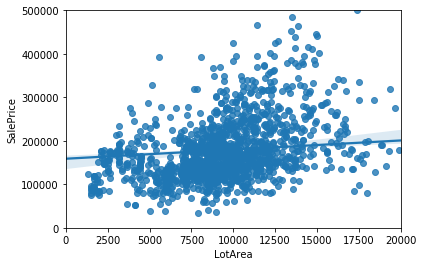

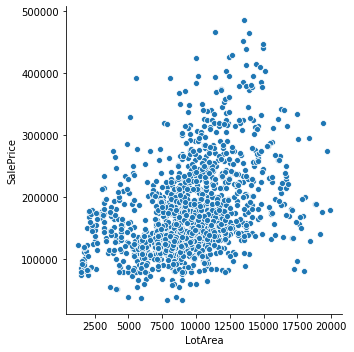

In [20]:
g = sns.regplot(x=LotArea, y=SalesPrice, fit_reg=True)
g.set(xlim=(0,20000), ylim=(0,500000))
sns.relplot(x='LotArea', y='SalePrice', data=dataset.query('LotArea < 20000 & SalePrice < 500000'))

Les prix sont extremement concentrés entre 100 000 et 250 000 pour des "LotArea" entre 7500 et 12500 pieds carrés

## Question 5

In [22]:
LotFrontage = dataset['LotFrontage']

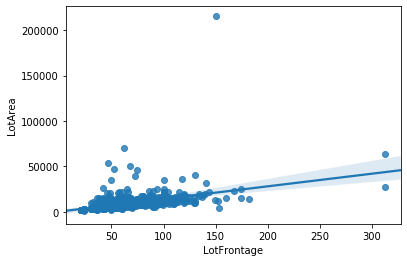

In [25]:
g = sns.regplot(x=LotFrontage, y=LotArea, fit_reg=True)

## Question 6

[(0, 100000), (0, 200)]

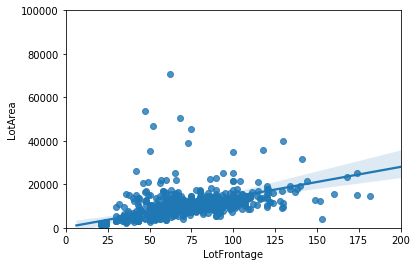

In [26]:
g = sns.regplot(x=LotFrontage, y=LotArea, fit_reg=True)
g.set(xlim=(0,200), ylim=(0,100000))

Les lotFrontage sont concentrés entre 25 et 125 pour des "LotArea" inférieur à 20000 pieds carrés

# Visualisation de relations continues

## Question 1

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as mp

In [14]:
dataset = pd.read_csv("./data/sales_predictions.csv", sep=',')
print("dataset loaded")

dataset loaded


In [4]:
dataset.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


## Question 2

In [5]:
price = dataset['item_price']
day = dataset['date']

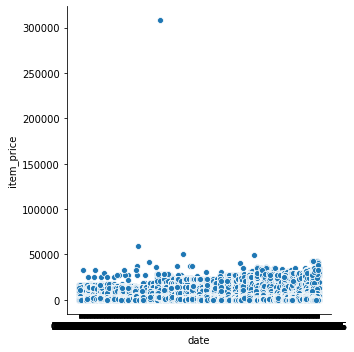

In [15]:
g = sns.relplot(x="date", y="item_price", data=dataset)
g

Il est difficile de tirer quelque chose de ce graphique, la visualisation n'est pas très parlante et brouillon. Les dates sont illisibles.

## Question 3

In [16]:
sampled = dataset.sample(n=50)

In [112]:
price = sampled['item_price']
day = sampled['date']

## Question 4

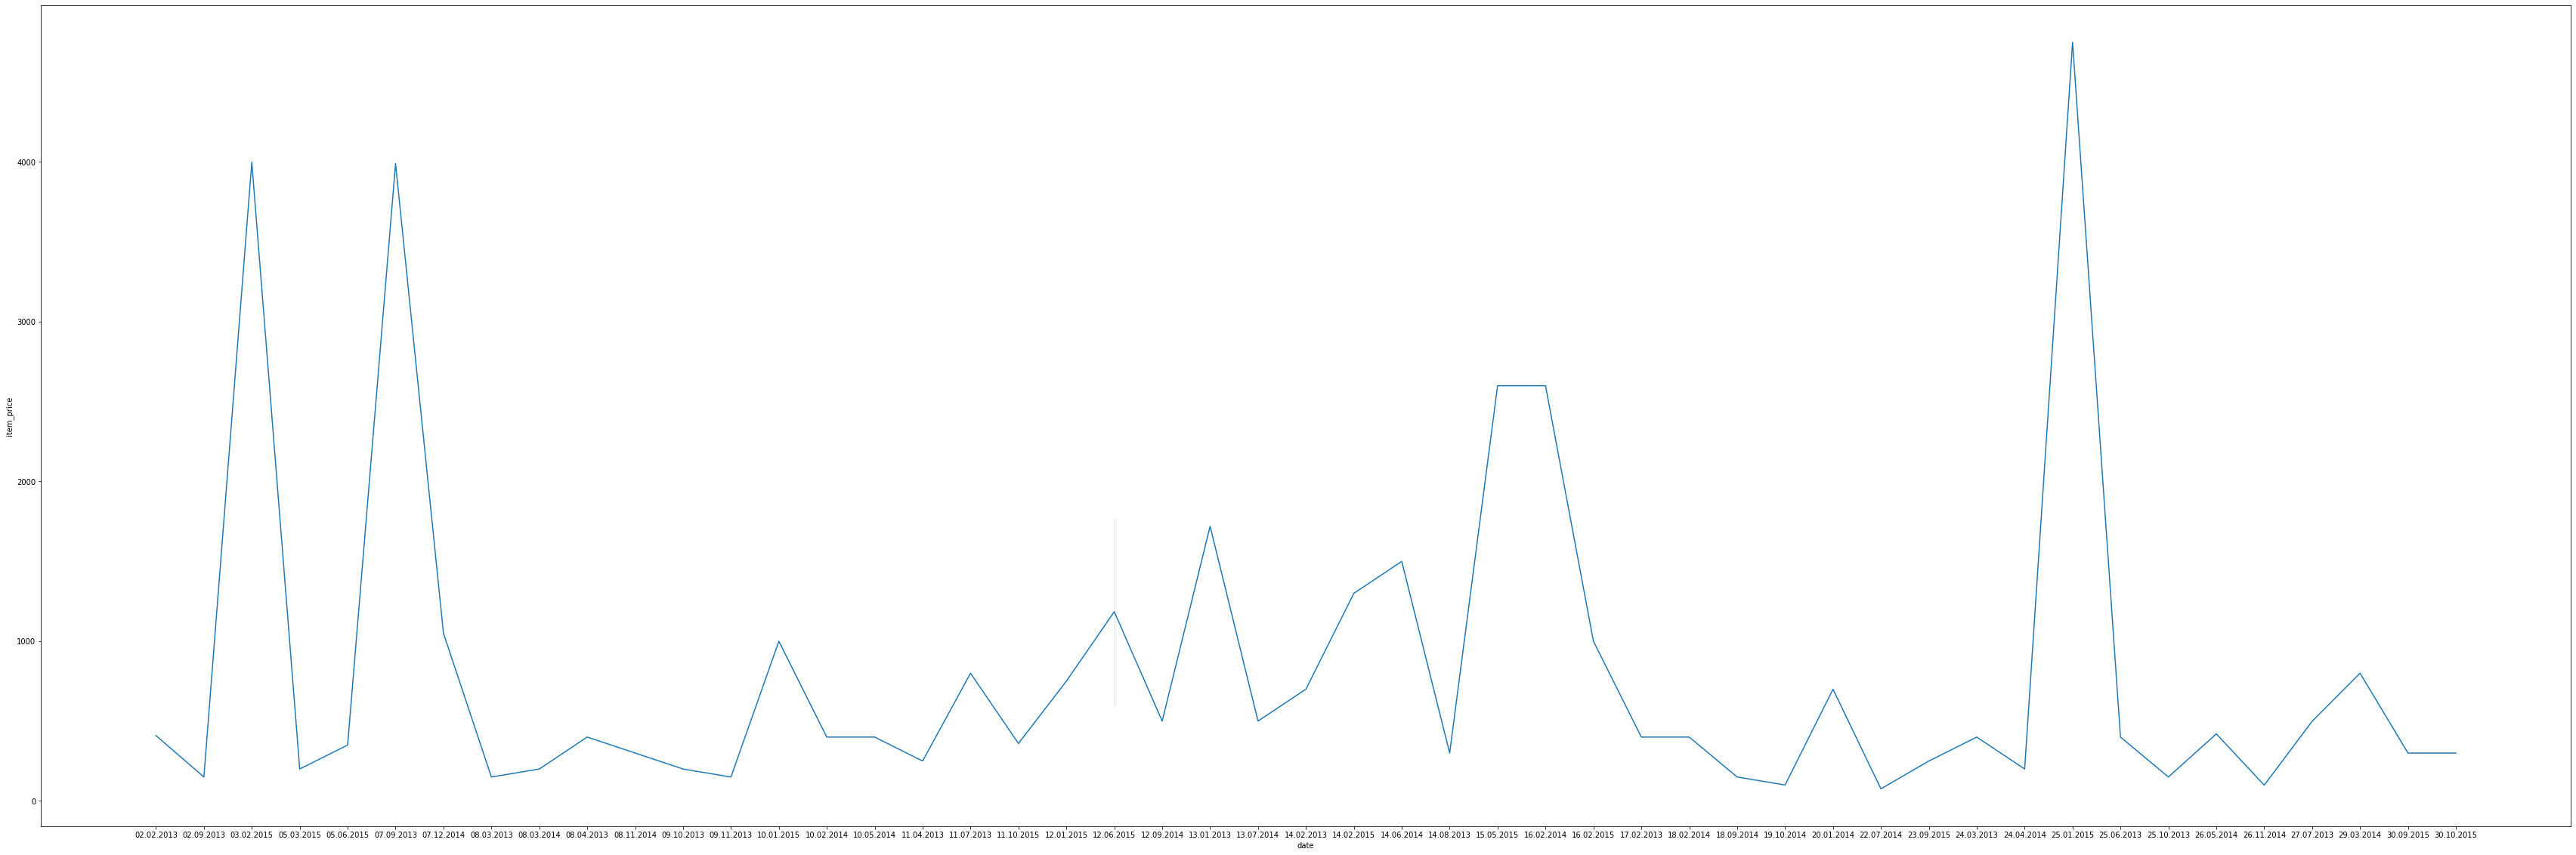

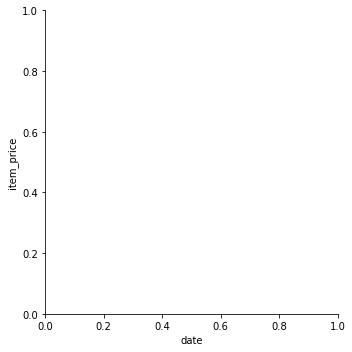

In [22]:
f, ax = mp.subplots(figsize=(60, 20))
g = sns.relplot(x="date", y="item_price", data=sampled, kind='line', ax = ax)
g

Les prix changent très peu en fonction du temps et commence à s'éparpiller à partir de 1000 dollars, quelques valeurs aberrantes néanmoins, notamment des prix au dessus de 2500 dont un à 3000 et un à 4000.

## Question 5

In [24]:
convertDate = pd.to_datetime(sampled['date'])
convertDate

1738459   2014-06-13
2736251   2015-07-18
311087    2013-04-03
697775    2013-07-18
299401    2013-03-30
1575160   2014-06-04
1637956   2014-10-05
1373285   2014-08-02
1051576   2013-11-13
1770961   2014-06-18
1519622   2014-04-03
2623547   2015-07-05
1338801   2014-10-01
2763908   2015-07-24
1550020   2014-04-29
92629     2013-07-01
1751161   2014-06-17
735322    2013-08-23
1246700   2013-12-16
2139269   2014-11-18
2529818   2015-03-24
2203452   2014-12-27
316696    2013-03-30
2284406   2014-12-28
177235    2013-02-02
1388975   2014-02-27
2654003   2015-05-17
2072205   2014-10-13
538149    2013-02-06
1558882   2014-04-19
814727    2013-08-27
2716183   2015-08-06
999609    2013-10-10
1961533   2014-09-20
98186     2013-01-19
776760    2013-01-08
2734703   2015-07-18
1687897   2014-03-05
2733388   2015-07-28
1849396   2014-07-27
2489037   2015-03-26
2729537   2015-07-17
993086    2013-10-26
716886    2013-07-21
1139432   2013-12-17
2139708   2014-11-17
1797865   2014-07-18
160197    201

## Question 6

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

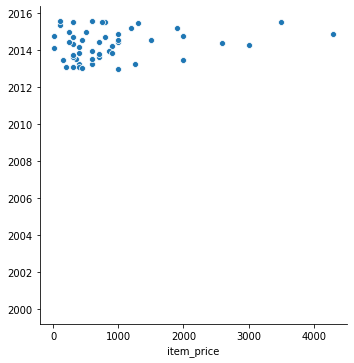

In [27]:
g = sns.relplot(x='item_price', y=convertDate, data=sampled)
g.figure.set_size_inches(20, 6)
sns.despine()

# Visulisation de variables catégoriques

## Question 1

In [27]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as mp
from matplotlib.pyplot import figure

In [28]:
dataset = pd.read_csv("./data/ibm_hr_attrition.csv", sep=',')
print("dataset loaded")

dataset loaded


In [29]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Question 2

In [32]:
dataset.JobSatisfaction.describe()

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

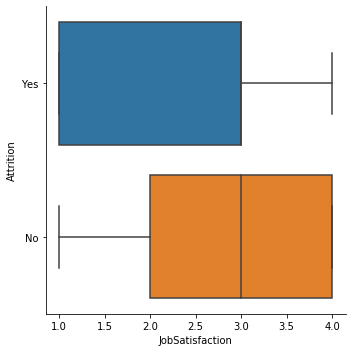

In [30]:
g = sns.catplot(x='JobSatisfaction', y='Attrition', data=dataset, kind='box')

## Question 3

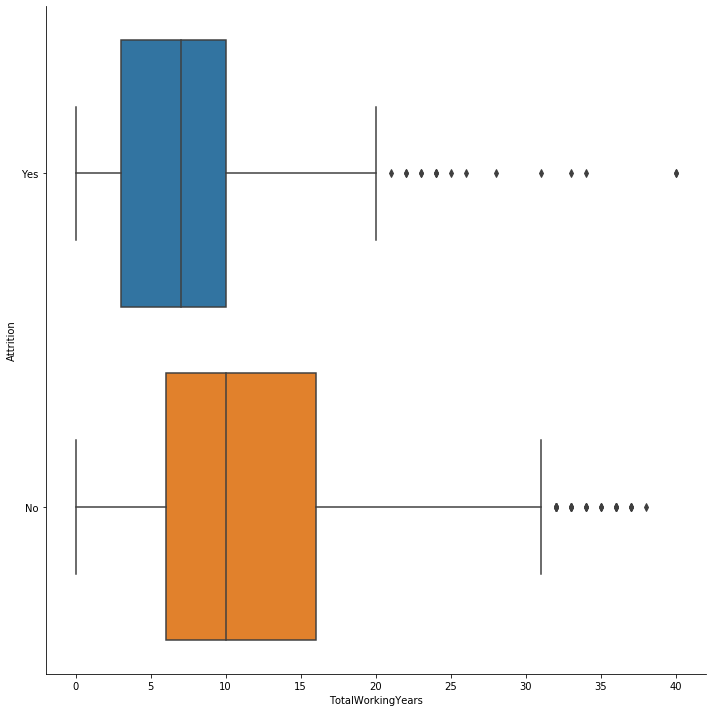

In [36]:
g = sns.catplot(x='TotalWorkingYears', y='Attrition', data=dataset, kind='box', height=10)

Les résultats avec un boxplot sont plus explicite qu'avec le catplot. On remarque que les personnes ayant quitté l'entreprise ont un taux de satisfaction de leur travail inférieur à trois. Mis à part quelques-uns.

## Question 4

Oui, on peut identifier les valeurs aberrantes avec un boxplot, elles sont identifiables grâce au trait qui part de la boîte.

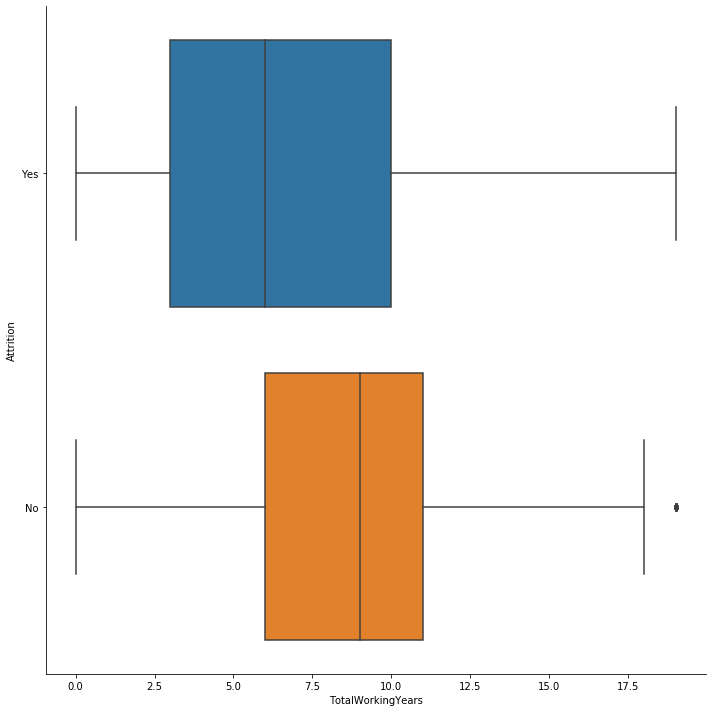

In [38]:
jobS = dataset[dataset['TotalWorkingYears'] < 20]
sns.catplot(x='TotalWorkingYears', y='Attrition', data=jobS, kind='box', height=10)

## Question 5

In [69]:
aberrant = dataset[dataset['JobSatisfaction']<2.5]['Attrition']
aberrant

1        No
4        No
6        No
10       No
15       No
       ... 
1461    Yes
1463     No
1466     No
1467     No
1468     No
Name: Attrition, Length: 569, dtype: object

In [70]:
aberrant.describe()

count     569
unique      2
top        No
freq      457
Name: Attrition, dtype: object

## Question 6 

In [49]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
dataset.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Les salariés sont globalement satisfaits, la moyenne étant de 2.7 (quasiment 3), cela s'explique par les 75% qui sont pleinement satisfait.

## Question 8

In [66]:
aberrant = dataset[dataset['JobSatisfaction']<2.5]['TotalWorkingYears']
aberrant

1       10
4        6
6       12
10       6
15      10
        ..
1461    20
1463    10
1466     9
1467     6
1468    17
Name: TotalWorkingYears, Length: 569, dtype: int64

## Question 9 

In [45]:
#replaced = dataset['Attrition'].map({'Yes': 1, 'No': 0})
dataset.Attrition = dataset.Attrition.replace(to_replace = ['Yes', 'No'], value=[1,0])
#replaced
dataset.head()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [40]:
edfield = dataset[replaced==1]['EducationField']
edfield

0          Life Sciences
2                  Other
14         Life Sciences
21         Life Sciences
24               Medical
              ...       
1438           Marketing
1442             Medical
1444    Technical Degree
1452       Life Sciences
1461           Marketing
Name: EducationField, Length: 237, dtype: object

## Question 10

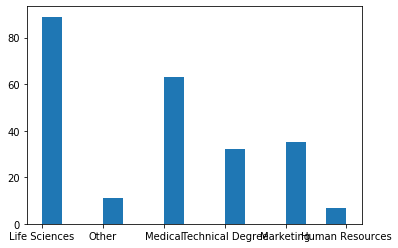

<Figure size 720x1440 with 0 Axes>

In [114]:
#sns.distplot(edfield)
mp.hist(edfield, bins=15)
#mp.bar(edfield, height=1, width=0)
mp.figure(figsize=(10,20))
mp.show()

# Visualisation d'une distribution

## Question 2

In [118]:
monthlyIncome = dataset['MonthlyIncome']

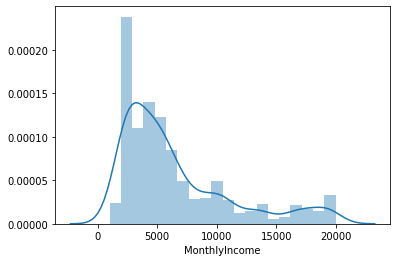

In [119]:
sns.distplot(monthlyIncome)

## Question 3

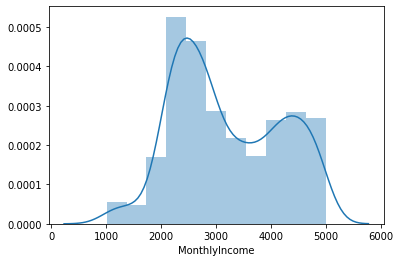

In [8]:
#mp.xlim(0, 5000)

filtered = dataset[dataset['MonthlyIncome'] < 5000]
sns.distplot(filtered['MonthlyIncome'])

## Visualisation d'une relation linéaire

## Question 2

In [9]:
X = np.asarray(dataset.loc[:, ["Attrition", "DistanceFromHome"]].values, dtype="str")
X

array([['Yes', '1'],
       ['No', '8'],
       ['Yes', '2'],
       ...,
       ['No', '4'],
       ['No', '2'],
       ['No', '8']], dtype='<U3')

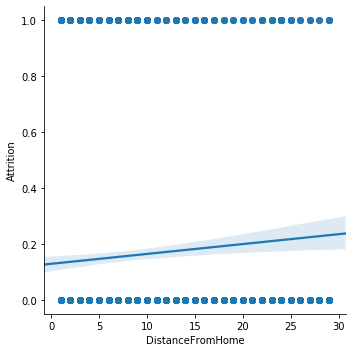

In [46]:
g = sns.lmplot(x='DistanceFromHome', y="Attrition", data=dataset)
g

Il y a autant de départ de l'entreprise en fonction de la distance de la maison que de personnes qui restent

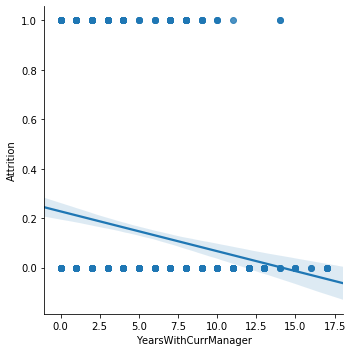

In [47]:
g = sns.lmplot(x='YearsWithCurrManager', y="Attrition", data=dataset)
g

Les personnes restent souvent longtemps avec leur Manager, les personnes qui partent ne restent pas plus de 10/11 années passées avec leur Manager.

# Visualisation d'une heatmap

## Question 2

In [140]:
dataset = pd.read_csv("./data/house_pricing.csv", sep=',')
print("dataset loaded")

dataset loaded


In [27]:
y = dataset[dataset.columns[-15:]].corr()
y

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
WoodDeckSF,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,-0.009551,0.021011,0.022270,0.324413
OpenPorchSF,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762,-0.018584,0.071255,-0.057619,0.315856
EnclosedPorch,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578
3SsnPorch,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.000354,0.029474,0.018645,0.044584
ScreenPorch,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.031946,0.023217,0.010694,0.111447
PoolArea,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


## Question 3

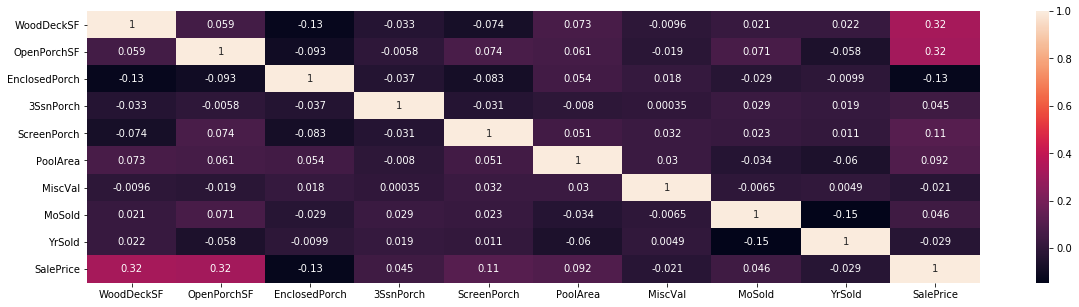

In [32]:
f, ax = mp.subplots(figsize=(20, 5))
sns.heatmap(y, annot=True, ax=ax)

In [150]:
means = sum(X) / X.shape[0]
#calcul de la variance 
variance = sum((X - means)**2) / X.shape[0]
std = np.sqrt(variance)

In [151]:
covar = np.zeros((X.shape[1], X.shape[1]))  # Matrice de covariance
#calcul de la corrélation 
corr = np.zeros((X.shape[1], X.shape[1]))  # Matrice de corrélation

#affichage de la variance 
print(variance)

[1.56990532e+04 4.38685445e+03 3.73299173e+03 8.58917168e+02
 3.10675998e+03 2.45969468e+05 7.30458810e+00 1.76262854e+00
 6.30678859e+09]


In [156]:
for i in range(X.shape[1]):
    for j in range(i+1):
        covar[i, j] = covar[j, i] = np.dot(X[:,i], X[:,j]) / X.shape[0] - means[i] * means[j]
        corr[i, j] = corr[j, i] = covar[i, j] / (std[i] * std[j])

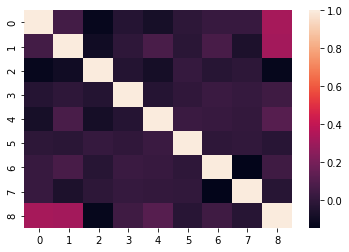

In [154]:
g = sns.heatmap(corr)